<img src="../images/house.jpeg" style="float: center; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge

_Author: Afolabi Cardoso_

---

## Ridge Model 

---
#### Contents
[Overview](#Overview) | [Imports](#Imports) | [Feature Selection](#Feature-Selection) | [Model Creation](#Model-Creation) | [Model Fit](#Model-Fit) | [Model Evaluation](#Model-Evaluation) | [Conclusion](#Conclusion) | [Kaggle Submission](#Kaggle-Submission)

---
## Overview

The Ridge is very similay to the Lasso. The main difference is that the ridge regression has a much greater penalty on the outliers

$$ \|\mathbf{y} - \mathbf{X}\beta\|^2 + \alpha\|\beta\|^2 $$

---
## Imports

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge

#### Import the train dataset as df

In [54]:
df = pd.read_csv('../datasets/train_clean.csv',index_col=[0])

#### Import the test (Kaggle) dataset as df_test

In [55]:
df_test = pd.read_csv('../datasets/test_clean.csv',index_col=[0])

---
## Feature Selection

Before I dummify the categorical variables, I am going to concat the train and test dataset. This is done to ensure that both datasets have equal number of columns after dummification

In [56]:
objects_to_drop = ['House Style','Condition 1',
'Roof Matl','Exterior 2nd']
df.drop(columns=objects_to_drop, inplace=True)
df_test.drop(columns=objects_to_drop, inplace=True)

In [57]:
df_concat = pd.concat((df, df_test))

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Using get_dummies method I dummify the concated dataset

In [58]:
df_concat_dummies = pd.get_dummies(df_concat, drop_first=True)

Split concatenated datasets into seperate train and test datasets

In [59]:
df_train = df[['Id']].merge(df_concat_dummies, how='left')
df_test = df_test[['Id']].merge(df_concat_dummies, how='left').drop(columns=['SalePrice'])

During the dummification, SalePrice was converted into floats. Using lambda function I'll convert it back to integer

In [60]:
df_train['SalePrice'] = df_train['SalePrice'].map(lambda x: int(x))

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2050
Columns: 204 entries, Id to Utilities_NoSewr
dtypes: float64(10), int64(27), uint8(167)
memory usage: 943.4 KB


#### Drop columns with low correlation first

In [62]:
low_corr = ['Screen Porch','Bedroom AbvGr','3Ssn Porch','Mo Sold','BsmtFin SF 2',
       'Pool Area','Misc Val','Yr Sold','Low Qual Fin SF','Bsmt Half Bath','MS SubClass','Overall Cond','Kitchen AbvGr','Enclosed Porch']

In [63]:
objects_to_drop = ['House Style','Condition 1',
'Roof Matl','Exterior 2nd']

integers_to_drop = ['2nd Flr SF','Gr Liv Area','Garage Yr Blt','Year Remod/Add']

In [64]:
df_train.drop(columns=low_corr+integers_to_drop, inplace=True)
df_test.drop(columns=low_corr+integers_to_drop, inplace=True)

---
## Model Creation

Create model parameters

In [65]:
features = list(df_train.columns) 

In [66]:
X = df_train[features].drop(columns=['SalePrice'])
y = df_train['SalePrice']

#### Train/test/split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

#### Applying Standard Scaler on train dataset

In [68]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### Applying Standard Scaler on test dataset

In [69]:
df_test_ss = ss.transform(df_test)

#### Instantiate Ridge Regression Model

In [70]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

## Model Fit

#### Fit the model

In [71]:
ridge_model.fit(X_train, y_train);

## Model Evaluation

#### Baseline

In [72]:
y.mean()

181469.70160897123

#### Train set evaluation

In [73]:
ridge_model.score(X_train, y_train)

0.8883305524735456

#### Test set evaluation

In [74]:
ridge_model.score(X_test, y_test)

0.9059624946822689

#### Root Mean Squared Error

Find the residuals 

In [75]:
y_predicted =  ridge_model.predict(X_test)
residuals = y_test - y_predicted

In [76]:
mse = metrics.mean_squared_error(y_test,y_predicted)
rmse = mse**0.5

Use residuals to calculate the Mean Squared Error

#### Cross evaluation

In [77]:
cross_val_score(ridge_model, X_train, y_train).mean()

/Users/captcardoso/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8163975260759043

#### Histogram plot of the residuals

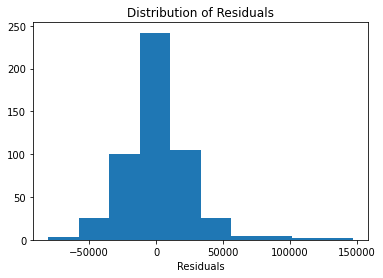

In [78]:
plt.hist(residuals)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals');

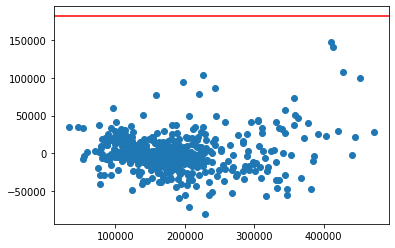

In [86]:
plt.axhline(y.mean(), color = 'r')
plt.scatter(ridge_model.predict(X_test), residuals);

---
## Conclusion

The Ridge model has an $R^2$ score of 81% which is very close to that of Lasso regression.

For this housing dataset, both the ridge and lasso regression models performed similarly better than the linear regression/OLS method. 

---
## Kaggle Submission

Get SalePrice for the kaggle dataset using the Lasso model created

In [80]:
y_kaggle = ridge_model.predict(df_test_ss) 

Create a dataframe of the ID and predicted sale price

In [81]:
df_test['SalePrice'] = y_kaggle
model_submission = df_test[['Id','SalePrice' ]]
model_submission

,Id,SalePrice
0,2658,77647.257240
1,2718,144395.281018
2,2414,221370.551014
3,1989,107385.166337
4,625,178859.013982
...,...,...
873,1662,190389.347262
874,1234,212207.198123
875,1373,126513.178811
876,1672,102928.329498


---
## Export

#### Export model_submission dataframe

In [82]:
model_submission.set_index('Id', inplace=True)

In [83]:
model_submission.to_csv('../datasets/ridge_model.csv')